# INCOME PREDICTION

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Step 1 Crisp-DM: Data Understanding

Examine how income interacts with other factors like property and vehicle ownership to identify customer profiles with high potential for a credit limit increase.


## Step 2 Crisp-DM: Business Understanding

### Data Dictionary

| Column Name           | Description                                                          |
|-----------------------|----------------------------------------------------------------------|
| reference_date         | The reference date for the information or transactions.              |
| client_id              | Unique identifier of the client.                                     |
| gender                 | Client's gender (M for male, F for female).                          |
| vehicle_ownership      | Indicates whether the client owns a vehicle (1 for yes, 0 for no).   |
| property_ownership     | Indicates whether the client owns a property (1 for yes, 0 for no).  |
| number_of_children     | Number of children the client has.                                   |
| income_type            | Client's income type (e.g., salaried, self-employed, etc.).          |
| education              | Client's education level (e.g., high school, college degree, etc.).  |
| marital_status         | Client's marital status (e.g., single, married, etc.).               |
| residence_type         | Client's residence type (e.g., rented, owned, etc.).                 |
| age                    | Client's age.                                                       |
| employment_time        | Client's current employment duration (in years).                     |
| household_size         | Number of people living in the client's household.                   |
| income                 | Client's monthly income.                                             |





In [113]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import mstats
from ydata_profiling import ProfileReport
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

%matplotlib inline

In [114]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [115]:
colunas_renomeadas = {
    'data_ref': 'reference_date',
    'id_cliente': 'client_id',
    'sexo': 'gender',
    'posse_de_veiculo': 'vehicle_ownership',
    'posse_de_imovel': 'property_ownership',
    'qtd_filhos': 'number_of_children',
    'tipo_renda': 'income_type',
    'educacao': 'education',
    'estado_civil': 'marital_status',
    'tipo_residencia': 'residence_type',
    'idade': 'age',
    'tempo_emprego': 'employment_duration',
    'qt_pessoas_residencia': 'number_of_household_members',
    'renda': 'income'
}

In [116]:
renda.rename(columns=colunas_renomeadas, inplace=True)

In [117]:
renda.head(1)

,Unnamed: 0,reference_date,client_id,gender,vehicle_ownership,property_ownership,number_of_children,income_type,education,marital_status,residence_type,age,employment_duration,number_of_household_members,income
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [118]:
renda['income'] = mstats.winsorize(renda['income'], limits=[0, 0.05])

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [120]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [121]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [122]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   15000 non-null  int64  
 1   reference_date               15000 non-null  object 
 2   client_id                    15000 non-null  int64  
 3   gender                       15000 non-null  object 
 4   vehicle_ownership            15000 non-null  bool   
 5   property_ownership           15000 non-null  bool   
 6   number_of_children           15000 non-null  int64  
 7   income_type                  15000 non-null  object 
 8   education                    15000 non-null  object 
 9   marital_status               15000 non-null  object 
 10  residence_type               15000 non-null  object 
 11  age                          15000 non-null  int64  
 12  employment_duration          12427 non-null  float64
 13  number_of_househ

In [123]:
renda['employment_duration'].fillna(renda['employment_duration'].mean(),inplace=True)

/tmp/ipykernel_272456/2045047748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  renda['employment_duration'].fillna(renda['employment_duration'].mean(),inplace=True)


In [124]:
renda.drop('Unnamed: 0', axis=1, inplace=True)

In [125]:
renda.columns

Index(['reference_date', 'client_id', 'gender', 'vehicle_ownership',
       'property_ownership', 'number_of_children', 'income_type', 'education',
       'marital_status', 'residence_type', 'age', 'employment_duration',
       'number_of_household_members', 'income'],
      dtype='object')

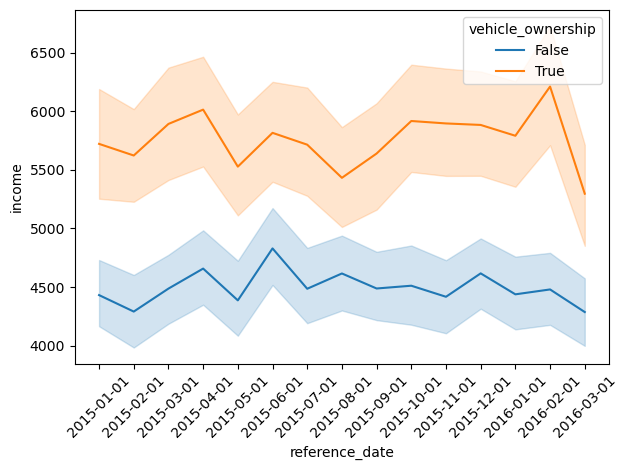

In [126]:
sns.lineplot(x='reference_date', y='income', hue='vehicle_ownership', data=renda)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

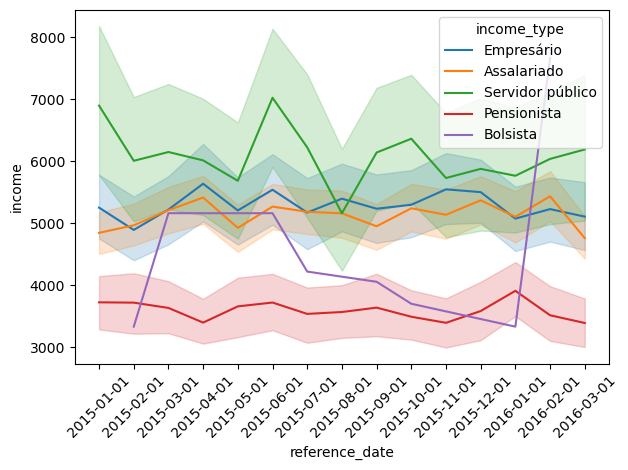

In [127]:
sns.lineplot(x='reference_date', y='income', hue='income_type', data=renda)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

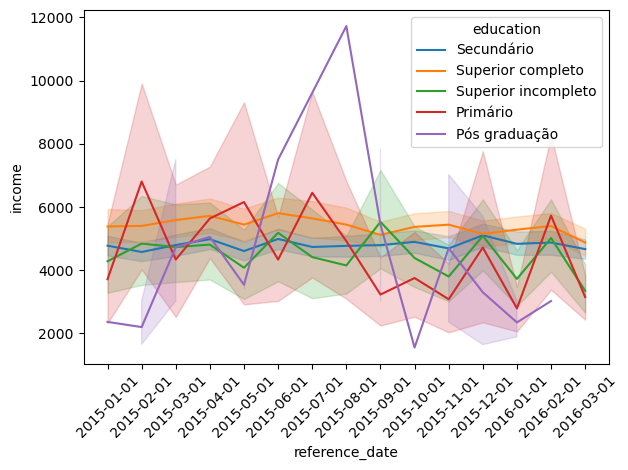

In [128]:
sns.lineplot(x='reference_date', y='income', hue='education', data=renda)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

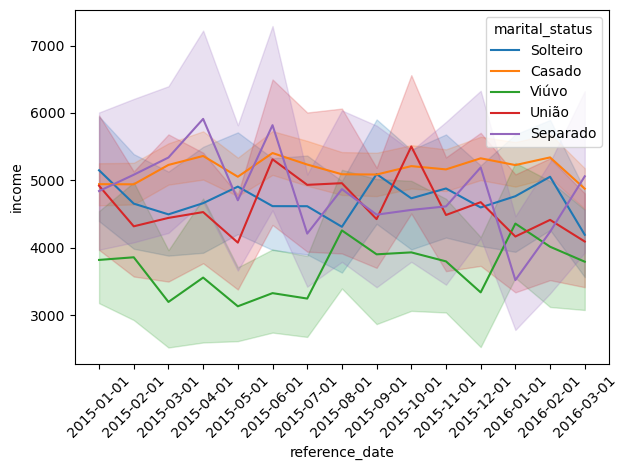

In [129]:
sns.lineplot(x='reference_date', y='income', hue='marital_status', data=renda)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

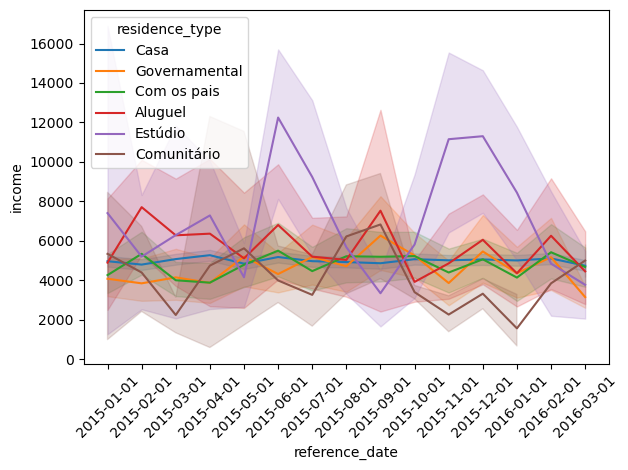

In [130]:
sns.lineplot(x='reference_date', y='income', hue='residence_type', data=renda)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### vehicle_ownership, income_type and marital_status have a good correlation with income

### Entendimento dos dados - Bivariadas




<Axes: xlabel='property_ownership', ylabel='income'>

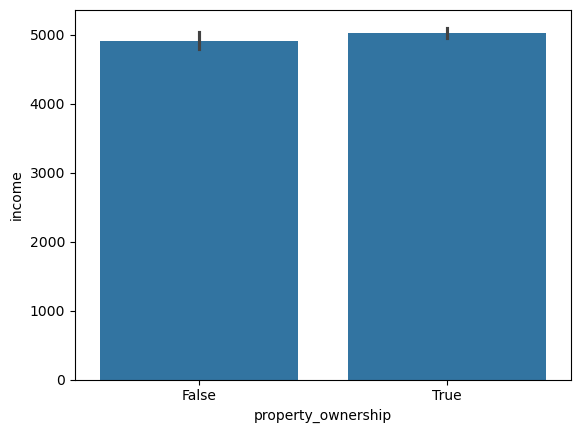

In [133]:
sns.barplot(x='property_ownership', y='income', data=renda)

<Axes: xlabel='vehicle_ownership', ylabel='income'>

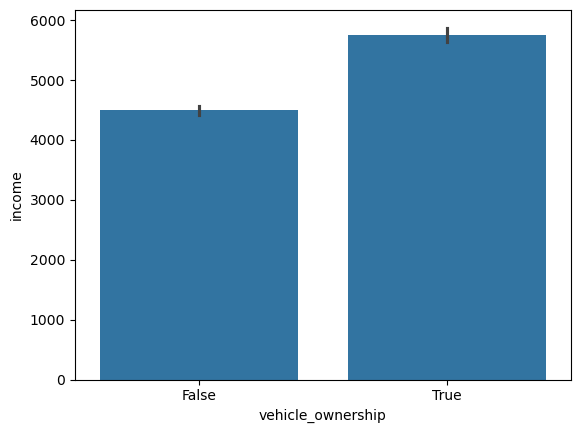

In [134]:
sns.barplot(x='vehicle_ownership', y='income', data=renda)

<Axes: xlabel='number_of_children', ylabel='income'>

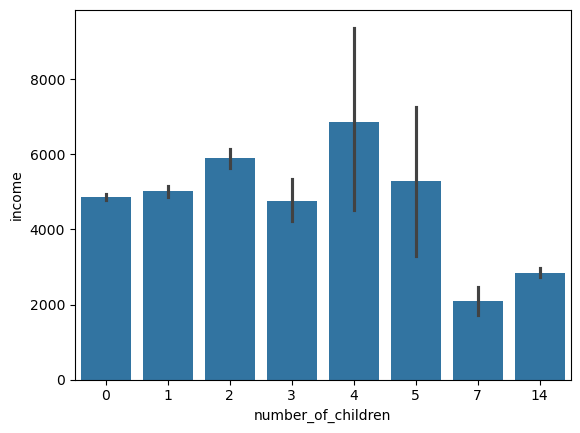

In [135]:
sns.barplot(x='number_of_children', y='income', data=renda)

<Axes: xlabel='income_type', ylabel='income'>

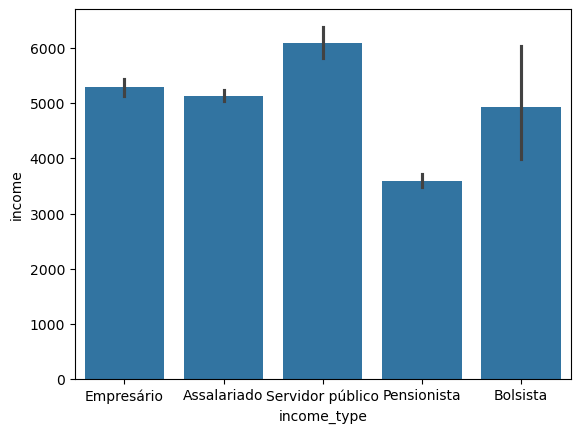

In [136]:
sns.barplot(x='income_type', y='income', data=renda)

<Axes: xlabel='education', ylabel='income'>

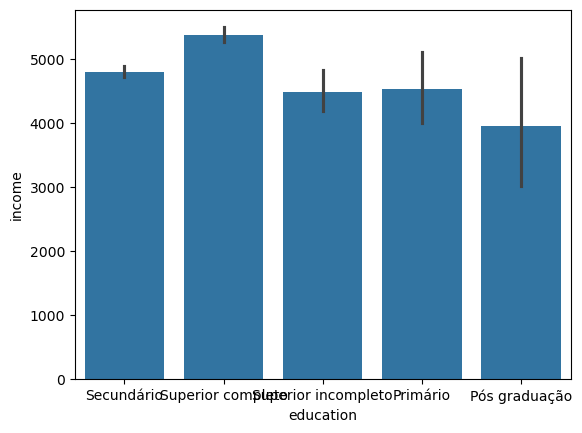

In [137]:
sns.barplot(x='education', y='income', data=renda)

<Axes: xlabel='marital_status', ylabel='income'>

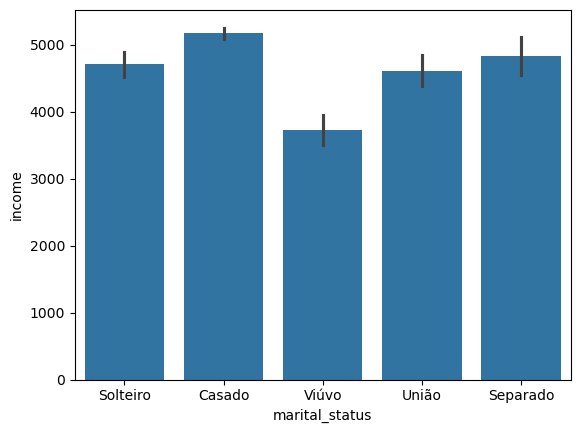

In [138]:
sns.barplot(x='marital_status', y='income', data=renda)

<Axes: xlabel='residence_type', ylabel='income'>

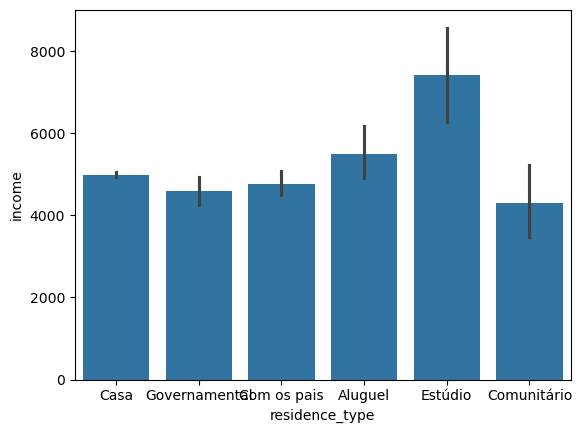

In [139]:
sns.barplot(x='residence_type', y='income', data=renda)

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


In [142]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   reference_date               15000 non-null  object 
 1   client_id                    15000 non-null  int64  
 2   gender                       15000 non-null  object 
 3   vehicle_ownership            15000 non-null  bool   
 4   property_ownership           15000 non-null  bool   
 5   number_of_children           15000 non-null  int64  
 6   income_type                  15000 non-null  object 
 7   education                    15000 non-null  object 
 8   marital_status               15000 non-null  object 
 9   residence_type               15000 non-null  object 
 10  age                          15000 non-null  int64  
 11  employment_duration          15000 non-null  float64
 12  number_of_household_members  15000 non-null  float64
 13  income          

In [143]:
renda.duplicated().sum()

407

In [144]:
renda.drop_duplicates(inplace=True)

In [145]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14593 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   reference_date               14593 non-null  object 
 1   client_id                    14593 non-null  int64  
 2   gender                       14593 non-null  object 
 3   vehicle_ownership            14593 non-null  bool   
 4   property_ownership           14593 non-null  bool   
 5   number_of_children           14593 non-null  int64  
 6   income_type                  14593 non-null  object 
 7   education                    14593 non-null  object 
 8   marital_status               14593 non-null  object 
 9   residence_type               14593 non-null  object 
 10  age                          14593 non-null  int64  
 11  employment_duration          14593 non-null  float64
 12  number_of_household_members  14593 non-null  float64
 13  income               

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


## Regression Tree


In [148]:
renda.drop('reference_date',axis=1,inplace=True)

In [149]:
renda = pd.get_dummies(renda, columns=['gender', 'income_type', 'education', 'marital_status', 'residence_type'])
renda.dtypes

client_id                          int64
vehicle_ownership                   bool
property_ownership                  bool
number_of_children                 int64
age                                int64
employment_duration              float64
number_of_household_members      float64
income                           float64
gender_F                            bool
gender_M                            bool
income_type_Assalariado             bool
income_type_Bolsista                bool
income_type_Empresário              bool
income_type_Pensionista             bool
income_type_Servidor público        bool
education_Primário                  bool
education_Pós graduação             bool
education_Secundário                bool
education_Superior completo         bool
education_Superior incompleto       bool
marital_status_Casado               bool
marital_status_Separado             bool
marital_status_Solteiro             bool
marital_status_União                bool
marital_status_V

In [198]:
X = renda.drop(['income'],axis=1).copy()
y = renda['income']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [258]:
#training tree
reg_1 = DecisionTreeRegressor(max_depth=2)
reg_2 = DecisionTreeRegressor(max_depth=4)
reg_3 = DecisionTreeRegressor(max_depth=6)

reg_1.fit(X_test, y_test)
reg_2.fit(X_test, y_test)
reg_3.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=6)

In [260]:
mse1 = reg_1.score(X_test, y_test)
mse2 = reg_2.score(X_test, y_test)
mse3 = reg_3.score(X_test, y_test)

text = "R-squared in the tree with deep = {0} é: {1:.2f}"

print(text.format(reg_1.get_depth(), mse1))
print(text.format(reg_2.get_depth(), mse2))
print(text.format(reg_3.get_depth(), mse3))

R-squared in the tree with deep = 2 é: 0.30
R-squared in the tree with deep = 4 é: 0.38
R-squared in the tree with deep = 6 é: 0.43


In [264]:
mse1 = reg_1.score(X_train, y_train)
mse2 = reg_2.score(X_train, y_train)
mse3 = reg_3.score(X_train, y_train)

text = "R-squared (train) in the tree with deep = {0} é: {1:.2f}"

print(text.format(reg_1.get_depth(), mse1))
print(text.format(reg_2.get_depth(), mse2))
print(text.format(reg_3.get_depth(), mse3))

R-squared (train) in the tree with deep = 2 é: 0.30
R-squared (train) in the tree with deep = 4 é: 0.36
R-squared (train) in the tree with deep = 6 é: 0.34


## Etapa 5 Crisp-DM: Avaliação dos resultados


#### The best is with depp = 4, with deep probably is overfit because have a big diference between R-squared train and test

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.